#04 - Data Handling

To test my network with each activation function, a robust data set is required. I have trained my models on an open-source Portuguese data set on wine quality, which rates wines on a scale of one to ten depending on different chemical characteristics (like pH or alcohol content). Normalization techniques like Z-score scaling have been implemented to effectively compare different features

In [ ]:
#Importing existing network structure
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / "src"))
from utils import make_mlp, set_seed, plot_loss

In [ ]:
from ucimlrepo import fetch_ucirepo

#Fetching dataset from open-source machine learning repo
wine_quality = fetch_ucirepo(id=186)

#Turning the data into features and outputs
X = wine_quality.data.features
y = wine_quality.data.targets

#Metadata
print(wine_quality.metadata)

#Variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

array([[<Axes: title={'center': 'alcohol'}>]], dtype=object)

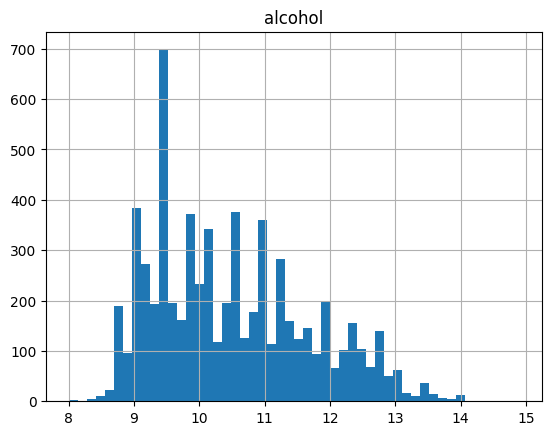

In [ ]:
import pandas as pd
#Organizing features as a Pandas dataframe
df = wine_quality.data.features
df.hist(column='alcohol', bins=50)

In [ ]:
#Splitting output features into two classes
targets = wine_quality.data.targets
labels = (targets >= 7).astype(int)
labels.value_counts()
#Transforming labels to a Numpy-editable format
labels=labels["quality"].to_numpy()
labels
X = df.to_numpy()
X

,count
quality,
0,5220
1,1277


In [ ]:
from sklearn.model_selection import train_test_split
#Splitting datasets into training, validation, and test groups
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)
x_train.shape

#Z-score scaling
m = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train-m)/std

x_val = (x_val-m)/std
x_test = (X_test-m)/std

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch

#Creating the trainable data set in randomly shuffled batches
num_epochs = 75
dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train[:, None], dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(torch.tensor(x_val, dtype=torch.float32), torch.tensor(y_val[:, None], dtype = torch.float32))
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)